# Insights on CO2 Emissions for the Southeastern Region of Brazil

This dataset was retrieved at Brazilian Open Data Portal in the [Energy Sources section](http://dados.gov.br/dataset/fontes-energeticas). 

__The Brazilian Open Data Portal__ is the tool made available by the government so that everyone can find and use public data and information. The portal values simplicity and organization so that you can easily find the data and information you need. The portal also aims to promote dialogue between actors in society and with the government to think about the best use of data, promoting positive impacts from a social and economic point of view.

__Energy Sources Report__: List of legal entities registered in the Federal Technical Register of Potentially Polluting Activities and Users of Natural Resources - CTF / APP and registered in activities for which it is mandatory to fill in the form "Atmospheric Emissions - Energy Sources" in the Annual Report of Potentially Polluting Activities and Users of Environmental Resources - RAPP.

This dataset was built based on the __Energy Sources__ report and presents the list of people enrolled in the CTF by Municipality / UF, Activity developed (category and detail), registration status, type of energy source and the amount consumed, energy consumed and CO2 emissions.

This dataset was created in April/2019 and last updated in August/2019

__Author:__ Marcel Rocha Nascimento

__E-mail:__ marcel.nanoufrj@gmail.com

In [179]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np

#Import visualization libratires
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
# setting the size of the seaborn plots
from IPython.core.pylabtools import figsize

figsize(12, 9)

sns.set()

In [3]:
# loading the data
df = pd.read_csv('relatorio.csv', sep=';')

In [4]:
df.shape

(204444, 16)

In [5]:
# creating a status fucntion to help in the exploratory analysis
def create_status(df):
    """create a status dataset giving the column name, type, sum of NaNs and percentage of NaNs 
    Args:
    
    df: dataset
    
    Return:
    
    status: dataset (columns: column names of df,
                    type: type of the data in each column of df,
                    Sum of NaN: sum of NaN values for each column in df,
                    NaN%: percentage of NaN values for each column in df)
    """
    
    status= pd.DataFrame({'columns': df.columns,
                          'type': df.dtypes,
                          'Sum of NaN': df.isnull().sum(),
                          'NaN%': df.isnull().sum()/len(df)})
    return status

In [6]:
# first look at the data
df.head()

,CNPJ,Razão Social,Estado,Município,Código da Categoria,Categoria de Atividade,Código do Detalhe,Detalhe,Ano,Tipo de Fonte Energética,Quantidade Consumida,Unidade de Medida,Observações,Energia,Emissões de CO2,Situação Cadastral
0,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2012,Gás Natural (Seco),"1.920.000,000",t/m³,A quantidade de gás natural utilizada como mat...,"52,342","2.921,719",Ativa
1,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2013,Eletricidade - Rede Pública,"232,853",MWh,"Se possível, informe a quantidade de energia c...","0,838","0,000",Ativa
2,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2014,Eletricidade - Rede Pública,"314,790",MWh,"Se possível, informe a quantidade de energia c...","1,133","0,000",Ativa
3,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2015,Eletricidade - Rede Pública,"241,431",MWh,"Se possível, informe a quantidade de energia c...","0,869","0,000",Ativa
4,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2016,Eletricidade - Rede Pública,"223,423",MWh,"Se possível, informe a quantidade de energia c...","0,804","0,000",Ativa


In [7]:
df.columns

Index(['CNPJ', 'Razão Social', 'Estado', 'Município', 'Código da Categoria',
       'Categoria de Atividade', 'Código do Detalhe', 'Detalhe', 'Ano',
       'Tipo de Fonte Energética', 'Quantidade Consumida', 'Unidade de Medida',
       'Observações', 'Energia', 'Emissões de CO2 ', 'Situação Cadastral'],
      dtype='object')

In [8]:
# let's rename the columns.
df = df.rename(columns = {'Razão Social': 'company_name', 'Estado': 'state', 'Município': 'city',
                     'Código da Categoria': 'catogry_code', 'Categoria de Atividade':'activity_code',
                     'Código do Detalhe': 'detail_code', 'Detalhe': 'detail', 'Ano': 'year',
                     'Tipo de Fonte Energética': 'energy_source', 'Quantidade Consumida': 'quantity_consumed',
                     'Unidade de Medida': 'unity_measurement', 'Observações': 'comments', 'Energia':'energy',
                     'Emissões de CO2 ': 'CO2_emissions', 'Situação Cadastral': 'registration_status'})

In [9]:
status = create_status(df)
# checking tthe sum and percentage of NaN values
status.reindex(columns=['type','Sum of NaN','NaN%']).sort_values(by = 'Sum of NaN', ascending=False).head(16)

,type,Sum of NaN,NaN%
comments,object,25134,0.122938
CO2_emissions,object,4438,0.021708
CNPJ,object,0,0.000000
company_name,object,0,0.000000
state,object,0,0.000000
city,object,0,0.000000
catogry_code,int64,0,0.000000
activity_code,object,0,0.000000
detail_code,int64,0,0.000000
detail,object,0,0.000000


We can see that there aren't many NaN values. Also, the features that have NaN values, have them in an acceptable percentage (below 20 %). We will explore those data first and see how we can deal with them.

In [ ]:
# checking feature's content
df.comments.value_counts()

In [11]:
df = df.drop(columns =['comments']);

I decided to drop de `comments` column. I didn't find it so relevant to the analysis, this kind of information is concerns to the companies who filled the report. 

### Analyzing the NaN at the CO2_emissions column

In [12]:
def change_type(data, column):
    """ It formats float numbers in the brazilian standards to international standards"""
    
    """
    Args:
    
    data: dataframe
    column: column name
    
    Return:
    None
    """
    data[column] = data[column].str.replace('.', '')
    data[column] = data[column].str.replace(',', '.')
    data[column] = data[column].astype(float)
    

In [13]:
change_type(df,'CO2_emissions');

In [14]:
df['CO2_emissions'] = df['CO2_emissions'].dropna()

In the column `CO2_emissions` in this first analysis I opted to drop the NaN values, because the NaN percentage is very small (__0.021%__) so it won't impact so much in my analysis.
Another aproach would check the energy source for the CO2 emissions and then use the mean in each case.

### Adjusting the type of the `quantity_consumed` and `energy` features to float64

In [15]:
change_type(df,'quantity_consumed');

In [16]:
change_type(df,'energy');

In [17]:
# checking if the data type is now correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204444 entries, 0 to 204443
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CNPJ                 204444 non-null  object 
 1   company_name         204444 non-null  object 
 2   state                204444 non-null  object 
 3   city                 204444 non-null  object 
 4   catogry_code         204444 non-null  int64  
 5   activity_code        204444 non-null  object 
 6   detail_code          204444 non-null  int64  
 7   detail               204444 non-null  object 
 8   year                 204444 non-null  int64  
 9   energy_source        204444 non-null  object 
 10  quantity_consumed    204444 non-null  float64
 11  unity_measurement    204444 non-null  object 
 12  energy               204444 non-null  float64
 13  CO2_emissions        200006 non-null  float64
 14  registration_status  204444 non-null  object 
dtypes: float64(3), in

We can see that we successfully  changed the data type of the features

## Exploratory Analysis

* An exploratory anlaysis can be as long as you want deppending on the ammount of information available.
* For this analysis I will focus on the southeastern region of Brazil.

In [18]:
# spliting the dataset due the column type makes it easier to work on
numeric_columns = df.select_dtypes(include=['integer', 'floating'])
obj_columns = df.select_dtypes(include=['object'])

In [113]:
numeric_columns.describe()

,catogry_code,detail_code,year,quantity_consumed,energy,CO2_emissions
count,204444.000000,204444.000000,204444.000000,2.044440e+05,2.044440e+05,2.000060e+05
mean,9.654546,4.613112,2015.686721,3.305107e+06,3.340892e+04,1.360536e+06
std,6.290332,7.726304,2.160939,3.479904e+08,7.461152e+06,5.505755e+08
min,1.000000,1.000000,2011.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000,1.000000,2014.000000,1.183875e+01,5.500000e-02,0.000000e+00
50%,11.000000,2.000000,2016.000000,1.781930e+02,1.056000e+00,0.000000e+00
75%,16.000000,5.000000,2018.000000,2.929122e+03,1.552425e+01,0.000000e+00
max,100.000000,81.000000,2019.000000,9.583502e+10,3.212000e+09,2.460167e+11


In [20]:
obj_columns.head()

,CNPJ,company_name,state,city,activity_code,detail,energy_source,unity_measurement,registration_status
0,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,"Indústria Têxtil, de Vestuário, Calçados e Art...","Tingimento, estamparia e outros acabamentos em...",Gás Natural (Seco),t/m³,Ativa
1,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,"Indústria Têxtil, de Vestuário, Calçados e Art...","Tingimento, estamparia e outros acabamentos em...",Eletricidade - Rede Pública,MWh,Ativa
2,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,"Indústria Têxtil, de Vestuário, Calçados e Art...","Tingimento, estamparia e outros acabamentos em...",Eletricidade - Rede Pública,MWh,Ativa
3,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,"Indústria Têxtil, de Vestuário, Calçados e Art...","Tingimento, estamparia e outros acabamentos em...",Eletricidade - Rede Pública,MWh,Ativa
4,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,"Indústria Têxtil, de Vestuário, Calçados e Art...","Tingimento, estamparia e outros acabamentos em...",Eletricidade - Rede Pública,MWh,Ativa


In [177]:
# filter lists by regions in Brazil
southeast = ['SAO PAULO', 'MINAS GERAIS', 'RIO DE JANEIRO','ESPIRITO SANTO']         
norttheast = ['PERNAMBUCO', 'MARANHAO', 'CEARA', 'PARAIBA', 'SERGIPE', 'BAHIA', 'RIO GRANDE DO NORTE', 'ALAGOAS', 'PIAUI']
midwest = ['GOIAS', 'DISTRITO FEDERAL', 'MATO GROSSO', 'MATO GROSSO DO SUL',]
south = ['SANTA CATARINA',  'PARANA', 'RIO GRANDE DO SUL', ]
north = ['PARA', 'TOCANTINS',  'AMAZONAS', 'ACRE', 'AMAPA', 'RONDONIA', 'RORAIMA']

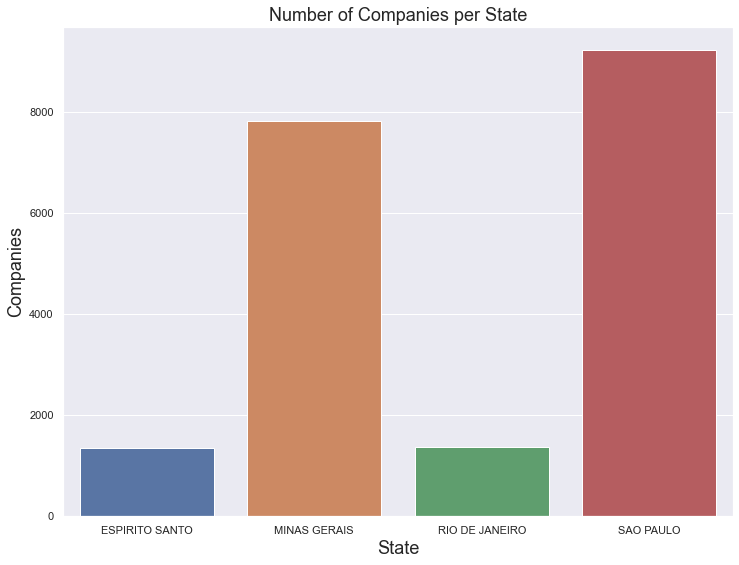

In [93]:
# first let's take a look in the numbe of companies per state
companies = df[df['state'].isin(southeast)].groupby(['state'])['CNPJ'].nunique().reset_index()
sns.barplot(x='state', y='CNPJ', data=companies)
plt.xlabel('State', {'fontsize':18})
plt.ylabel('Companies', {'fontsize':18})
plt.title('Number of Companies per State', {'fontsize':18})
plt.show()

The vast majority of companies are concentraded in the states of São Paulo and Minas gerais. Rio de Janeiro and Espirito Santo basically have the same amount of companies. 

In [139]:
# total co2 emissions per year in the southeastern region
total_emissions = state_emissions.groupby('year')['CO2_emissions'].sum().reset_index()

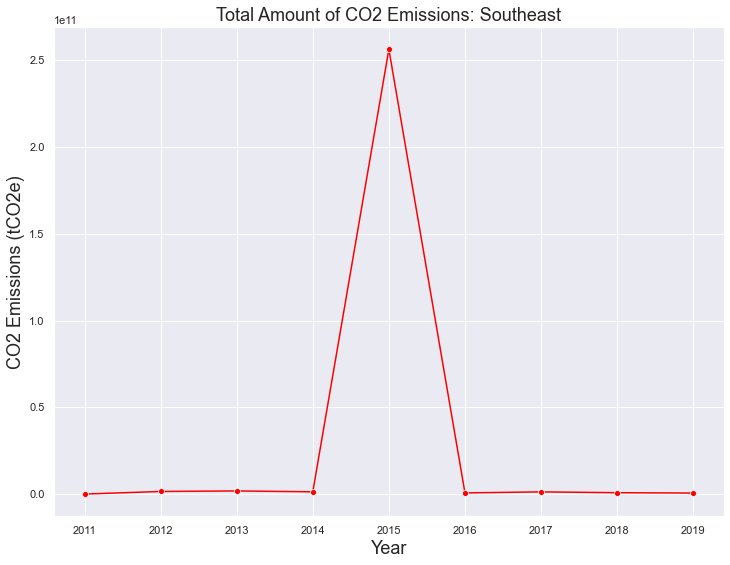

In [147]:
sns.lineplot(x='year', y='CO2_emissions', marker='o',color = 'red', data =total_emissions)
plt.xlabel('Year', {'fontsize':18})
plt.ylabel('CO2 Emissions (tCO2e)', {'fontsize':18})
plt.title('Total Amount of CO2 Emissions: Southeast', {'fontsize':18})
plt.show()

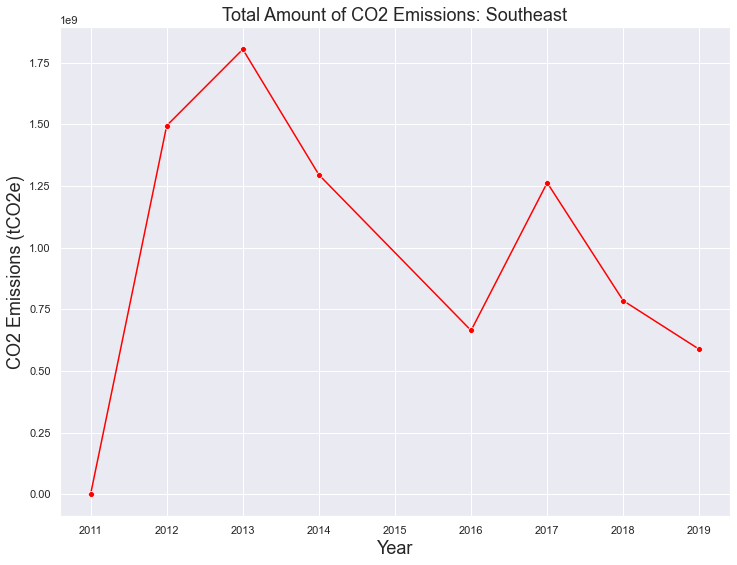

In [145]:
# excluding the year 0f 2015 so we can have a real look into the data 
sns.lineplot(x='year', y='CO2_emissions', marker='o',color = 'red', data =total_emissions[total_emissions['year'] != 2015])
plt.xlabel('Year', {'fontsize':18})
plt.ylabel('CO2 Emissions (tCO2e)', {'fontsize':18})
plt.title('Total Amount of CO2 Emissions: Southeast', {'fontsize':18})
plt.show()

For the total amount of emissions we can have some insights:

* In the year of 2015 was the CO2 emission peak.
* The total amout of CO2 emissions was 100x higher compared to the other years.
* It could be interesting to look into more information about this year to undertand what happened.

In [116]:
# checking the total co2 emissions for each state in the southeastern region
state_emissions = df[df['state'].isin(southeast)].groupby(['state', 'year'])['CO2_emissions'].sum().reset_index()
state_emissions['CO2_emissions'] = np.round(state_emissions['CO2_emissions'], 2)

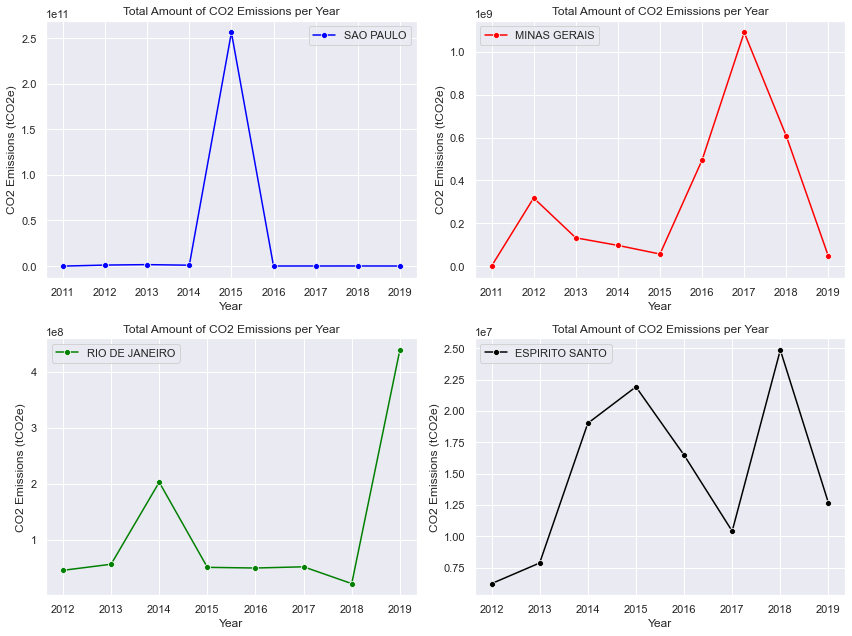

In [178]:
# comparing co2 emission per state
colors = ['blue', 'red', 'green', 'black']
for i,j in enumerate(southeast):
    ax=plt.subplot(2, 2, i+1)
    sns.lineplot(x='year', y='CO2_emissions', marker='o', label=j, color=colors[i],
                 data =state_emissions[state_emissions['state']== j], ax=ax)

    ax.set_title('Total Amount of CO2 Emissions per Year')
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 Emissions (tCO2e)')
plt.tight_layout()


Comparing the total of CO2 emissions for each state:

* It got clear that the state of São Paulo was the responsible for the huge peak in 2015.
* It makes sense for São Paulo and Minas Gerais to be the biggest CO2 producers as they concentrate the vast majority of companies in the southeastern region.
* It would be important to understand why Rio de Janeiro is increased the CO2 emission between 2018 and 2019 while the other states decreased.

__What's the next step?__

There's still plenty of information in this dataset to look into. We have some alternatives, we could expand the southeastern region analysis looking into the energy sources, amount of energy consumed making relationships between them and the CO2 emissions. Also we could expand this analysis for the other regions in Brazil. It is up to us and the business to decide what is the best path to take. 